# BINARY STAR IDENTIFICATION

In [53]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy.visualization.mpl_normalize import simple_norm
import matplotlib.pyplot as plt
import numpy as np
import os 
import shutil
import glob
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import Column
from astropy.nddata import CCDData
from astropy.io import fits
from astropy.visualization import LogStretch, ImageNormalize
import pandas as pd
from scipy.optimize import minimize

## Los cúmulos que se van a usar serán (ordenado de menor a mayor):

- El Joyero, NGC 4755 (16 Myr)
- M26 / NGC664 (85.3 Myr)
- NGC 2808 (12.500 Myr)

In [54]:
# Paths

path_ngc4755 = os.path.join("ngc4755.csv")
path_ngc6694 = os.path.join("ngc6694.csv")
path_ngc2808 = os.path.join("ngc2808.csv")

In [55]:
#  Tablas de información

ngc_4755 = pd.read_csv(path_ngc4755) # 6 arcmin
ngc_6694 = pd.read_csv(path_ngc6694) # 4 arcmin
ngc_2808 = pd.read_csv(path_ngc2808) # 4 arcmin

In [56]:
ngc_2808.keys() # para ver el nombre de las columnas

Index(['source_id', 'ra', 'dec', 'parallax', 'pmra', 'pmdec', 'ruwe',
       'phot_g_mean_mag', 'bp_rp', 'radial_velocity', 'radial_velocity_error',
       'rv_method_used', 'rv_nb_transits', 'rv_nb_deblended_transits',
       'rv_visibility_periods_used', 'rv_renormalised_gof', 'rv_chisq_pvalue',
       'rv_time_duration', 'rv_amplitude_robust', 'phot_variable_flag',
       'non_single_star', 'has_xp_continuous', 'has_xp_sampled', 'has_rvs',
       'has_epoch_photometry', 'has_epoch_rv', 'has_mcmc_gspphot',
       'has_mcmc_msc', 'teff_gspphot', 'logg_gspphot', 'mh_gspphot',
       'distance_gspphot', 'azero_gspphot', 'ag_gspphot', 'ebpminrp_gspphot'],
      dtype='object')

# DIAGRAMAS HR

In [57]:
ngc2808_bprp = ngc_2808['bp_rp']
ngc2808_g = ngc_2808['phot_g_mean_mag']
ngc2808_ns = ngc_2808['non_single_star']

In [58]:
ngc4755_bprp = ngc_4755['bp_rp']
ngc4755_v = ngc_4755['phot_g_mean_mag']
ngc4755_ns = ngc_4755['non_single_star']

In [59]:
ngc6694_bprp = ngc_6694['bp_rp']
ngc6694_v = ngc_6694['phot_g_mean_mag']
ngc6694_ns = ngc_6694['non_single_star']

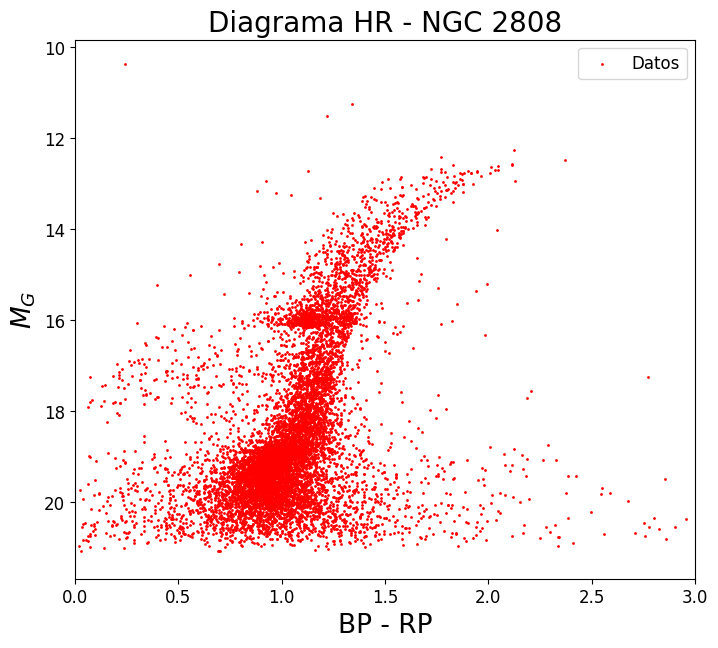

In [60]:
fig, ax = plt.subplots(figsize=[8,7])
ax.scatter(ngc2808_bprp, ngc2808_g, c='red', s=1, label='Datos')
ax.set_title('Diagrama HR - NGC 2808', fontsize=20)
ax.set_xlabel('BP - RP', fontsize=19)
ax.set_ylabel('$M_{G}$', fontsize=19)
ax.set_xlim(0, 3)
ax.invert_yaxis()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()
fig.tight_layout()

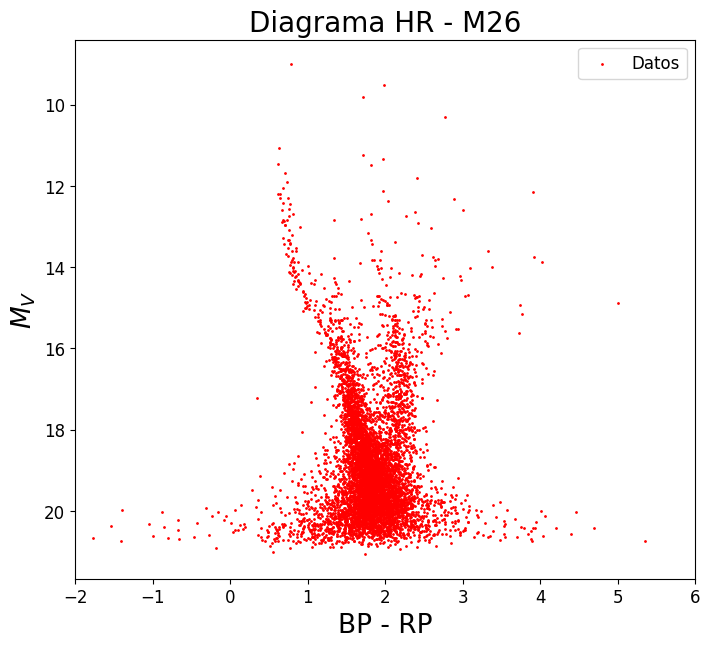

In [61]:
fig, ax = plt.subplots(figsize=[8,7])
ax.scatter(ngc6694_bprp, ngc6694_v, c='red', s=1, label='Datos')
ax.set_title('Diagrama HR - M26', fontsize=20)
ax.set_xlabel('BP - RP', fontsize=19)
ax.set_ylabel('$M_{V}$', fontsize=19)
ax.set_xlim(-2, 6)
ax.invert_yaxis()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()
fig.tight_layout()

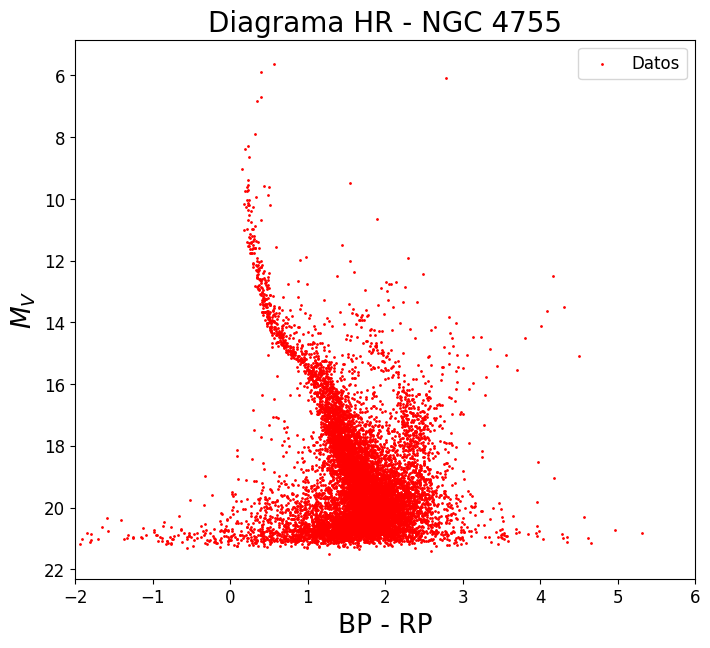

In [62]:
fig, ax = plt.subplots(figsize=[8,7])
ax.scatter(ngc4755_bprp, ngc4755_v, c='red', s=1, label='Datos')
ax.set_title('Diagrama HR - NGC 4755', fontsize=20)
ax.set_xlabel('BP - RP', fontsize=19)
ax.set_ylabel('$M_{V}$', fontsize=19)
ax.invert_yaxis()
ax.set_xlim(-2, 6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()
fig.tight_layout()

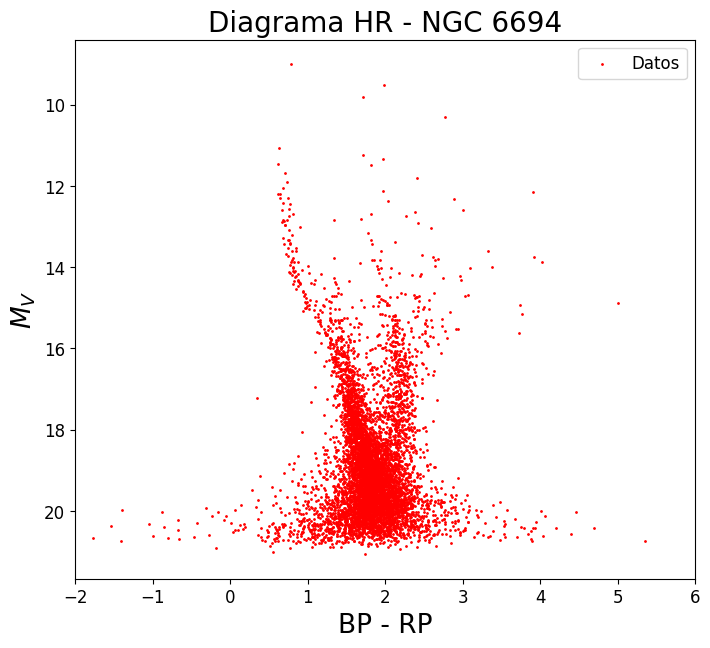

In [63]:
fig, ax = plt.subplots(figsize=[8,7])
ax.scatter(ngc6694_bprp, ngc6694_v, c='red', s=1, label='Datos')

ax.set_title('Diagrama HR - NGC 6694', fontsize=20)
ax.set_xlabel('BP - RP', fontsize=19)
ax.set_ylabel('$M_{V}$', fontsize=19)
ax.invert_yaxis()
ax.set_xlim(-2, 6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()
fig.tight_layout()